In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv("framingham.csv")
df.head()

male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           0

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [4]:
from collections import Counter
from ydata_profiling import ProfileReport as pr

In [5]:
pr(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 16/16 [00:00<00:00, 80.45it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
df = df.dropna()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3656 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             3656 non-null   int64  
 1   age              3656 non-null   int64  
 2   education        3656 non-null   float64
 3   currentSmoker    3656 non-null   int64  
 4   cigsPerDay       3656 non-null   float64
 5   BPMeds           3656 non-null   float64
 6   prevalentStroke  3656 non-null   int64  
 7   prevalentHyp     3656 non-null   int64  
 8   diabetes         3656 non-null   int64  
 9   totChol          3656 non-null   float64
 10  sysBP            3656 non-null   float64
 11  diaBP            3656 non-null   float64
 12  BMI              3656 non-null   float64
 13  heartRate        3656 non-null   float64
 14  glucose          3656 non-null   float64
 15  TenYearCHD       3656 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 485.6 KB


In [8]:
y = df['TenYearCHD']
X = df.iloc[:, :-1]

In [9]:
y

0       0
1       0
2       0
3       1
4       0
       ..
4231    0
4232    1
4233    1
4234    0
4237    0
Name: TenYearCHD, Length: 3656, dtype: int64

In [10]:
X

male  age  education  currentSmoker  cigsPerDay  BPMeds  \
0        1   39        4.0              0         0.0     0.0   
1        0   46        2.0              0         0.0     0.0   
2        1   48        1.0              1        20.0     0.0   
3        0   61        3.0              1        30.0     0.0   
4        0   46        3.0              1        23.0     0.0   
...    ...  ...        ...            ...         ...     ...   
4231     1   58        3.0              0         0.0     0.0   
4232     1   68        1.0              0         0.0     0.0   
4233     1   50        1.0              1         1.0     0.0   
4234     1   51        3.0              1        43.0     0.0   
4237     0   52        2.0              0         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    195.0  106.0   70.0  26.97   
1                   0             0         0    250.0  121.0   81.0  28.73   
2                   0             0         0    245.0  127.5   80.0  25.34   
3                   0             1         0    225.0  150.0   95.0  28.58   
4                   0             0         0    285.0  130.0   84.0  23.10   
...               ...           ...       ...      ...    ...    ...    ...   
4231                0             1         0    187.0  141.0   81.0  24.96   
4232                0             1         0    176.0  168.0   97.0  23.14   
4233                0             1         0    313.0  179.0   92.0  25.97   
4234                0             0         0    207.0  126.5   80.0  19.71   
4237                0             0         0    269.0  133.5   83.0  21.47   

      heartRate  glucose  
0          80.0     77.0  
1          95.0     76.0  
2          75.0     70.0  
3          65.0    103.0  
4          85.0     85.0  
...         ...      ...  
4231       80.0     81.0  
4232       60.0     79.0  
4233       66.0     86.0  
4234       65.0     68.0  
4237       80.0    107.0  

[3656 rows x 15 columns]

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [13]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
#Model
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
model

LogisticRegression()

In [15]:
lr_predict = model.predict(X_test)
lr_cnf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("Confusion matrix")
print(lr_cnf_matrix)
print("\n")
print("Accuracy Score")
print("Accuracy of Logistic regression is: ", lr_acc_score * 100)

Confusion matrix
[[617   6]
 [101   8]]


Accuracy Score
Accuracy of Logistic regression is:  85.38251366120218


In [16]:
print(classification_report(y_test, lr_predict))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       623
           1       0.57      0.07      0.13       109

    accuracy                           0.85       732
   macro avg       0.72      0.53      0.53       732
weighted avg       0.82      0.85      0.80       732



In [17]:
#M2 - Naive Bayes
nb = GaussianNB()
nb_model = nb.fit(X_train, y_train)
nb_model

GaussianNB()

In [18]:
nb_pred = nb_model.predict(X_test)
nb_cnf_matrix = confusion_matrix(y_test, nb_pred)
nb_acc_score = accuracy_score(y_test, nb_pred)
print("Confunsion Matrix")
print(nb_cnf_matrix)
print("Accuracy score for Naive Bayes: ", nb_acc_score * 100)
print(classification_report(y_test, nb_pred))

Confunsion Matrix
[[583  40]
 [ 89  20]]
Accuracy score for Naive Bayes:  82.37704918032787
              precision    recall  f1-score   support

           0       0.87      0.94      0.90       623
           1       0.33      0.18      0.24       109

    accuracy                           0.82       732
   macro avg       0.60      0.56      0.57       732
weighted avg       0.79      0.82      0.80       732



In [19]:
#M3 - Random Forest Classifier
rfc = RandomForestClassifier(n_estimators = 25, random_state = 0, max_depth = 6)
rfc_model = rfc.fit(X_train, y_train)
rfc_model

RandomForestClassifier(max_depth=6, n_estimators=25, random_state=0)

In [20]:
rfc_pred = rfc_model.predict(X_test)
rfc_cnf_matrix = confusion_matrix(y_test, rfc_pred)
rfc_acc_score = accuracy_score(y_test, rfc_pred)
print("Confusion_matrix")
print(rfc_cnf_matrix)
print("Accuracy score for Random Forest: ", rfc_acc_score * 100)
print(classification_report(y_test, rfc_pred))

Confusion_matrix
[[621   2]
 [108   1]]
Accuracy score for Random Forest:  84.97267759562843
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       623
           1       0.33      0.01      0.02       109

    accuracy                           0.85       732
   macro avg       0.59      0.50      0.47       732
weighted avg       0.77      0.85      0.78       732



In [21]:
#Model 4 - Extreme Gradient Boost
from xgboost import XGBClassifier
xg = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,
                    colsample_bytree=0.6,seed=27, 
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)
xg_model = xg.fit(X_train, y_train)
xg_model

XGBClassifier(base_score=None, booster='dart', callbacks=None,
              colsample_bylevel=0.6, colsample_bynode=0.5, colsample_bytree=0.6,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, feature_weights=None,
              gamma=0.6, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=25, n_jobs=None,
              num_parallel_tree=None, ...)

In [22]:
xg_pred = xg_model.predict(X_test)
xg_cnf_matrix = confusion_matrix(y_test, xg_pred)
xg_acc_score = accuracy_score(y_test, xg_pred)
print("Confusion_matrix")
print(xg_cnf_matrix)
print("Accuracy score for XGBClassifier: ", xg_acc_score * 100)
print(classification_report(y_test, xg_pred))

Confusion_matrix
[[623   0]
 [109   0]]
Accuracy score for XGBClassifier:  85.10928961748634
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       623
           1       0.00      0.00      0.00       109

    accuracy                           0.85       732
   macro avg       0.43      0.50      0.46       732
weighted avg       0.72      0.85      0.78       732



C:\Users\Debojyoti Das\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Debojyoti Das\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Debojyoti Das\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

In [23]:
#Model 5 - KNeighboursClassifier
knc = KNeighborsClassifier(n_neighbors = 12)
knc_model = knc.fit(X_train, y_train)
knc_model

KNeighborsClassifier(n_neighbors=12)

In [24]:
knc_pred = knc_model.predict(X_test)
knc_cnf_matrix = confusion_matrix(y_test, knc_pred)
knc_acc_score = accuracy_score(y_test, knc_pred)
print("Confusion matrix")
print(knc_cnf_matrix)
print("Accuracy for KNeighboursClassifier is: ", knc_acc_score * 100)
print(classification_report(y_test, knc_pred))

Confusion matrix
[[622   1]
 [104   5]]
Accuracy for KNeighboursClassifier is:  85.65573770491804
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       623
           1       0.83      0.05      0.09       109

    accuracy                           0.86       732
   macro avg       0.85      0.52      0.50       732
weighted avg       0.85      0.86      0.80       732



In [25]:
#Model 6 - Decision Tree Classifier
dtc = DecisionTreeClassifier(criterion = 'gini', random_state = 0, max_depth = 8)
dtc_model = dtc.fit(X_train, y_train)
dtc_model

DecisionTreeClassifier(max_depth=8, random_state=0)

In [26]:
dtc_pred = dtc_model.predict(X_test)
dtc_cnf_matrix = confusion_matrix(y_test, dtc_pred)
dtc_acc_score = accuracy_score(y_test, dtc_pred)
print("Confusion Matrix")
print(dtc_cnf_matrix)
print("Accuracy score for Decision Tree Classifier is: ", dtc_acc_score * 100)
print(classification_report(y_test, dtc_pred))

Confusion Matrix
[[593  30]
 [ 90  19]]
Accuracy score for Decision Tree Classifier is:  83.60655737704919
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       623
           1       0.39      0.17      0.24       109

    accuracy                           0.84       732
   macro avg       0.63      0.56      0.57       732
weighted avg       0.80      0.84      0.81       732



In [28]:
#Model 7 - Support Vector Classifier
svc = SVC(kernel = 'rbf', C = 2)
svc_model = svc.fit(X_train, y_train)
svc_model

SVC(C=2)

In [29]:
svc_pred = svc_model.predict(X_test)
svc_cnf_matrix = confusion_matrix(y_test, svc_pred)
svc_acc_score = accuracy_score(y_test, svc_pred)
print("Confusion Matrix")
print(svc_cnf_matrix)
print("Accuracy score for SVC model is: ", svc_acc_score * 100)
print(classification_report(y_test, svc_pred))

Confusion Matrix
[[620   3]
 [102   7]]
Accuracy score for SVC model is:  85.65573770491804
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       623
           1       0.70      0.06      0.12       109

    accuracy                           0.86       732
   macro avg       0.78      0.53      0.52       732
weighted avg       0.84      0.86      0.80       732



In [30]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Naive Bayes','Random Forest','Extreme Gradient Boost',
                    'K-Nearest Neighbour','Decision Tree','Support Vector Machine'], 
                    'Accuracy': [lr_acc_score*100,
                    nb_acc_score*100, rfc_acc_score*100, xg_acc_score*100, knc_acc_score*100, 
                    dtc_acc_score*100,svc_acc_score*100]})
model_ev

Model   Accuracy
0     Logistic Regression  85.382514
1             Naive Bayes  82.377049
2           Random Forest  84.972678
3  Extreme Gradient Boost  85.109290
4     K-Nearest Neighbour  85.655738
5           Decision Tree  83.606557
6  Support Vector Machine  85.655738

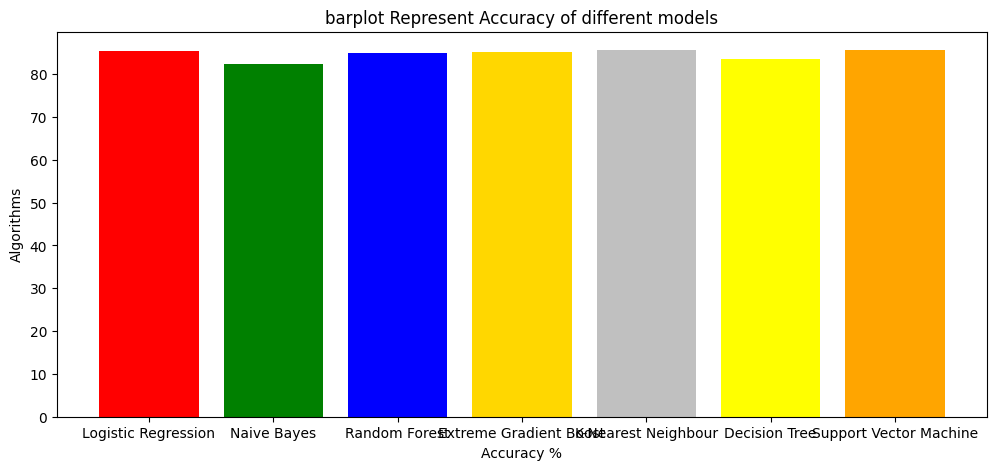

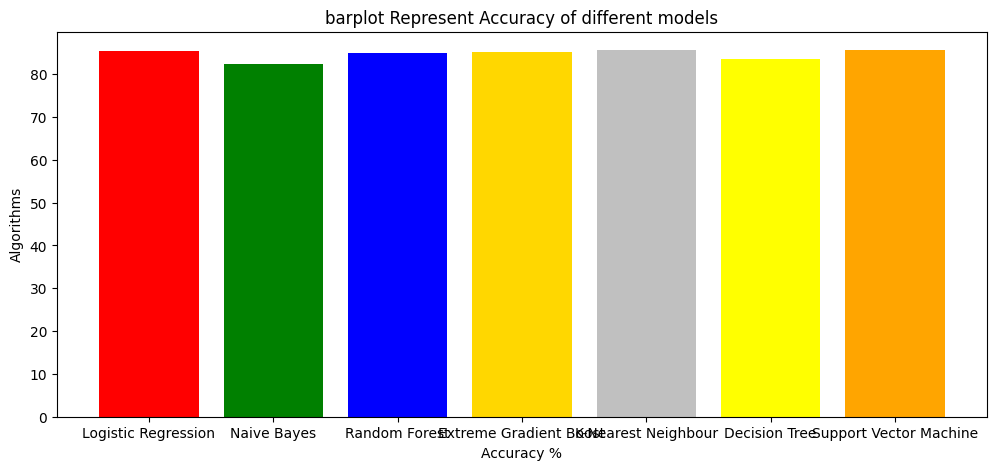

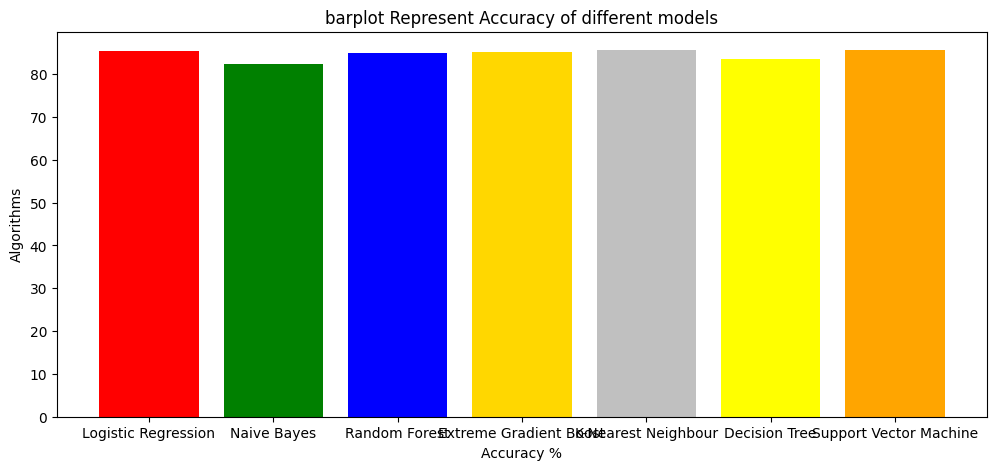

In [34]:
colors = ['red','green','blue','gold','silver','yellow','orange',]
plt.figure(figsize=(12,5))
plt.title("barplot Represent Accuracy of different models")
plt.xlabel("Accuracy %")
plt.ylabel("Algorithms")
plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)
plt.show()